Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise07/exercise07.ipynb)

# Exercise 7

## Problem

In week 7, you learned how to extend tabular data with geospatial information: points, linestrings, and polygons.

For this next exercise, please ask a planning-related question with a spatial component, then find data and apply any data science methods you have learned so-far (or can Google!) to answer that question.

## Data

You are welcome to use any data you would like, including data used in previous demos and exercises.

## A Few Pointers
- Choose a straightforward question that requires a reasonable amount of data! Don't shoot for the moon. This exercise is intended to give you a chance to practice finding and analyzing spatial data, not to address the world's greatest challenges.
- Consider using this exercise to get a head start on your final project or explore options for it. Your project doesn't need to focus on spatial analysis for it to play a role. Are there datasets you might join together based on spatial locations?
- Don't go overboard. If you're hitting a wall with coding, write pseudocode and turn that in. Don't let the perfect be the enemy of the done. But if you're energized and having fun by chasing down a thorny solution to a coding problem, by all means feel free to keep at it!



/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-55-e8b6f7431e5f>:15: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  proximity_analysis['distance_to_nearest'] = proximity_analysis.geometry.distance(bus_parking_df.unary_union)


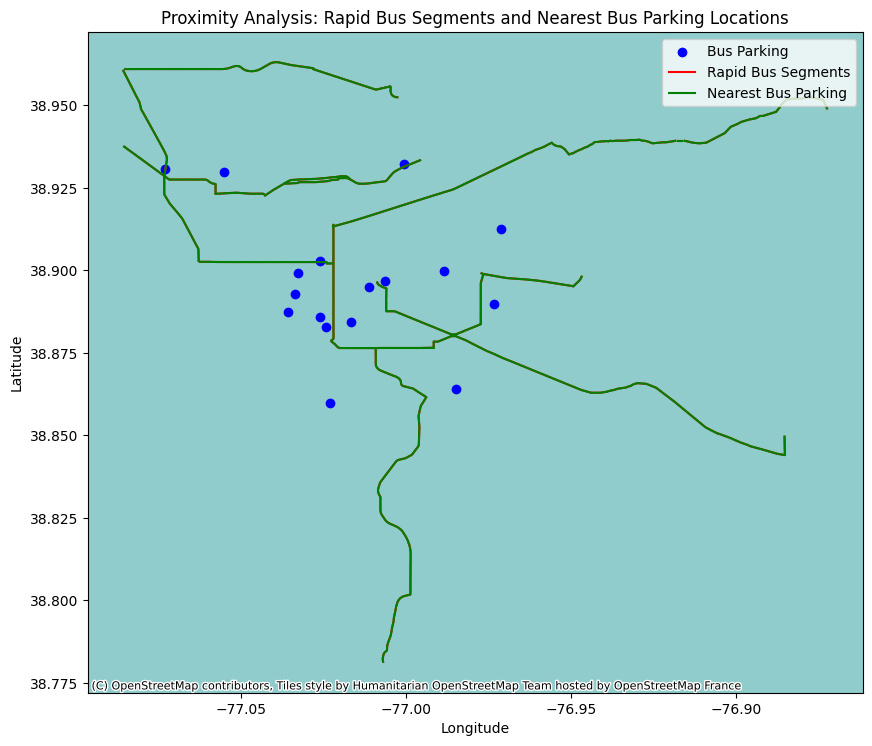

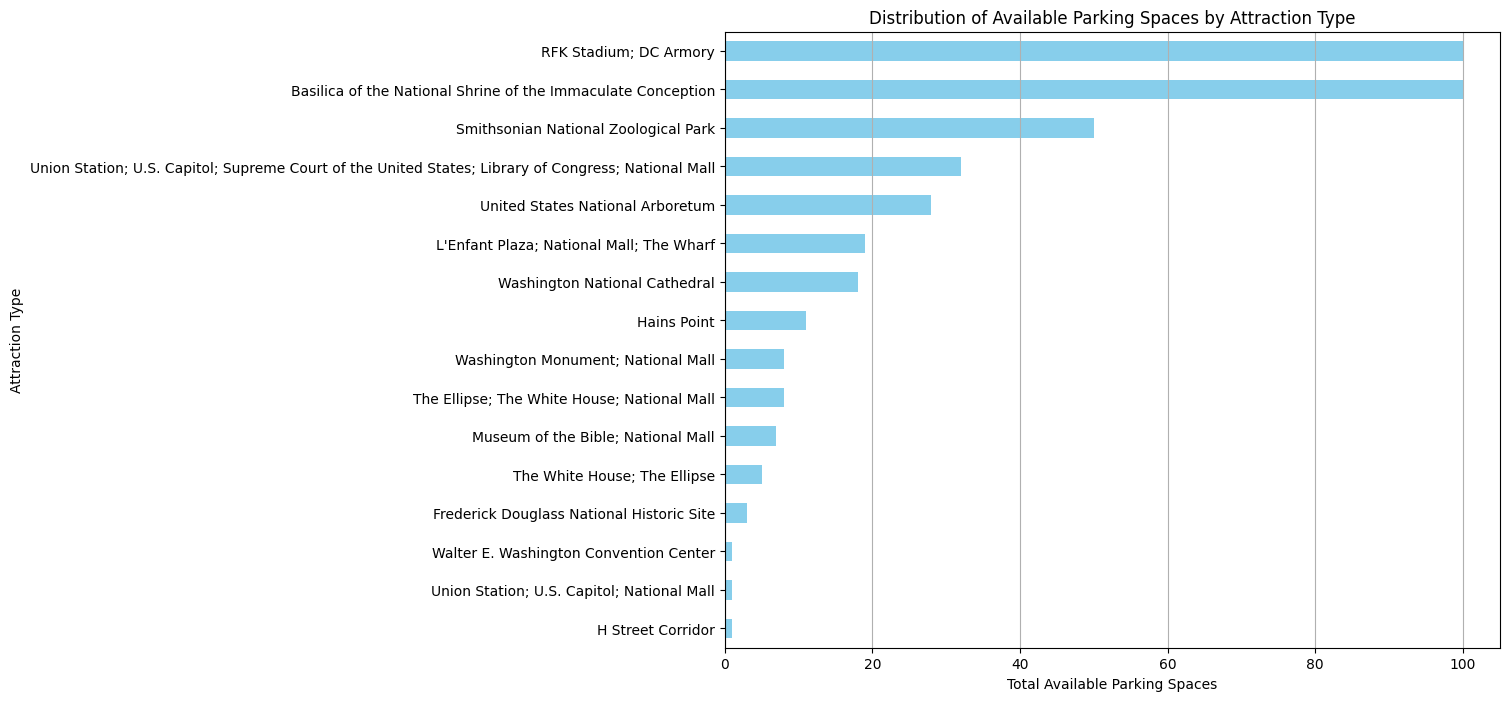

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


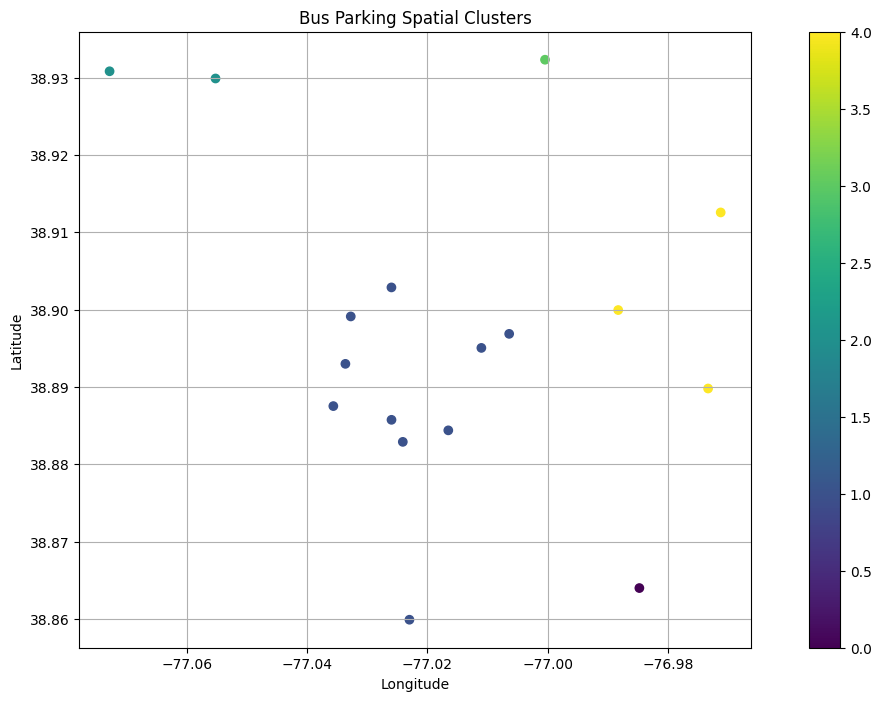

In [55]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.cluster import KMeans
import contextily as ctx

def analyze_bus_parking(rapid_bus_path, parking_path):
    # Load the datasets
    rapid_bus_df = gpd.read_file('/content/drive/MyDrive/Exercise 7/Project Datascience/2030_Proposed_Rapid_Bus')
    bus_parking_df = gpd.read_file('/content/drive/MyDrive/Exercise 7/Project Datascience/Bus_Parking')

    # Perform proximity analysis
    proximity_analysis = gpd.sjoin(rapid_bus_df, bus_parking_df, how="left", op="intersects")
    proximity_analysis['distance_to_nearest'] = proximity_analysis.geometry.distance(bus_parking_df.unary_union)
    nearest_parking = proximity_analysis.groupby('SEGMENT_NA')['LOCATION'].first()
    rapid_bus_df_with_nearest_parking = rapid_bus_df.merge(nearest_parking, left_on='SEGMENT_NA', right_index=True)

    # Visualize proximity analysis
    fig, ax = plt.subplots(figsize=(10, 10))
    bus_parking_df.plot(ax=ax, color='blue', label='Bus Parking')
    rapid_bus_df.plot(ax=ax, color='red', label='Rapid Bus Segments')
    rapid_bus_df_with_nearest_parking.plot(ax=ax, color='green', markersize=50, label='Nearest Bus Parking')
    ctx.add_basemap(ax, zoom=12)
    plt.legend()
    plt.title('Proximity Analysis: Rapid Bus Segments and Nearest Bus Parking Locations')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

    # Analyze parking spaces by attraction type
    plt.figure(figsize=(10, 8))
    bus_parking_df.groupby('ATTRACTION')['SPACES'].sum().sort_values().plot(kind='barh', color='skyblue')
    plt.title('Distribution of Available Parking Spaces by Attraction Type')
    plt.xlabel('Total Available Parking Spaces')
    plt.ylabel('Attraction Type')
    plt.grid(axis='x')
    plt.show()

    # Perform spatial clustering
    bus_parking_df['Latitude'] = bus_parking_df['geometry'].y
    bus_parking_df['Longitude'] = bus_parking_df['geometry'].x
    X = bus_parking_df[['Latitude', 'Longitude']]
    kmeans = KMeans(n_clusters=5, random_state=42)
    labels = kmeans.fit_predict(X)
    bus_parking_df['Cluster'] = labels

    # Visualize spatial clusters
    fig, ax = plt.subplots(figsize=(15, 8))
    bus_parking_df.plot(ax=ax, column='Cluster', cmap='viridis', legend=True)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Bus Parking Spatial Clusters')
    plt.grid(True)
    plt.show()


analyze_bus_parking('/content/drive/MyDrive/Exercise 7/Project Datascience/2030_Proposed_Rapid_Bus', '/content/drive/MyDrive/Exercise 7/Project Datascience/Bus_Parking')

#WEEK 07 EXERCISE


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [45]:
import os
import pandas as pd
import shapefile
import matplotlib.pyplot as plt
import geopandas as gpd
rapid_bus=gpd.read_file('/content/drive/MyDrive/Exercise 7/Project Datascience/2030_Proposed_Rapid_Bus')
rapid_bus.head()

,SEGMENT_NA,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,DCGIS.Rapi,OBJECTID,SHAPELEN,geometry
0,MILITARY,RapidBus_1,{007315E2-4C97-41DB-AE38-626C060032DF},None,None,None,None,0,1,0,"LINESTRING (-77.08530 38.96113, -77.08519 38.9..."
1,WISCONSIN,RapidBus_2,{46329FC8-AA3C-4621-84F5-F7FBB093E808},None,None,None,None,0,2,0,"LINESTRING (-77.06276 38.90258, -77.06276 38.9..."
2,RHODE ISLAND,RapidBus_3,{0C4ABF20-7650-4AAB-A70E-157600D7FDFD},None,None,None,None,0,3,0,"MULTILINESTRING ((-76.91580 38.93932, -76.9147..."
3,CALVERT,RapidBus_4,{833C2739-1E5B-441C-ADA5-F2E4AE1C6E3A},None,None,None,None,0,4,0,"MULTILINESTRING ((-77.08559 38.93767, -77.0854..."
4,7TH ST,RapidBus_5,{B5484291-E4E0-4B86-A528-74A06E238C77},None,None,None,None,0,5,0,"LINESTRING (-77.02273 38.87864, -77.02207 38.8..."


In [16]:
parking=gpd.read_file('/content/drive/MyDrive/Exercise 7/Project Datascience/Bus_Parking')
parking.head()

,LOCATION,ATTRACTION,STATUS,SPACES,TYPE,VISITOR_ON,NPS,REZREQ,CONTACT,PAID,WEBSITE,OBJECTID,geometry
0,300 block of L'Enfant Plaza SW,L'Enfant Plaza; National Mall; The Wharf,Operational,12,On-Street,No,No,No,311,Yes,https://godcgo.com/motorcoach/,1,POINT (-77.02598 38.88576)
1,200 block of 15th Street NW,The Ellipse; The White House; National Mall,Operational,8,On-Street,No,No,No,311,Yes,https://godcgo.com/motorcoach/,2,POINT (-77.03364 38.89300)
2,1400 block of New York Avenue NW,The White House; The Ellipse,Operational,5,On-Street,No,No,No,311,Yes,https://godcgo.com/motorcoach/,3,POINT (-77.03275 38.89913)
3,700-900 blocks of Frontage Road SW,L'Enfant Plaza; National Mall; The Wharf,Operational,7,On-Street,No,No,No,311,Yes,https://godcgo.com/motorcoach/,4,POINT (-77.02410 38.88291)
4,300 block of Virginia Avenue SW,Museum of the Bible; National Mall,Operational,7,On-Street,No,No,No,311,Yes,https://godcgo.com/motorcoach/,5,POINT (-77.01654 38.88440)


In [29]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the datasets
rapid_bus_df =gpd.read_file('/content/drive/MyDrive/Exercise 7/Project Datascience/2030_Proposed_Rapid_Bus')
bus_parking_df = gpd.read_file('/content/drive/MyDrive/Exercise 7/Project Datascience/Bus_Parking')



In [10]:
proximity_analysis = gpd.sjoin(rapid_bus_df, bus_parking_df, how="left", op="intersects")

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [11]:
proximity_analysis['distance_to_nearest'] = proximity_analysis.geometry.distance(bus_parking_df.unary_union)

<ipython-input-11-5af5ca16d92c>:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  proximity_analysis['distance_to_nearest'] = proximity_analysis.geometry.distance(bus_parking_df.unary_union)


In [13]:
nearest_parking = proximity_analysis.groupby('SEGMENT_NA')['LOCATION'].first()

In [14]:
rapid_bus_df_with_nearest_parking = rapid_bus_df.merge(nearest_parking, left_on='SEGMENT_NA', right_index=True)

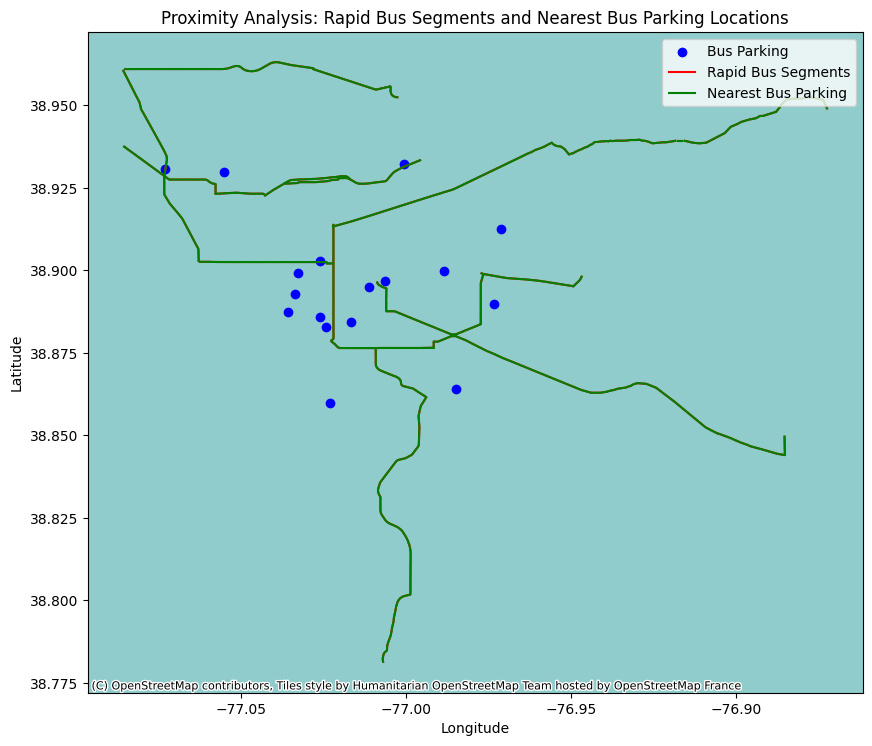

In [30]:
!pip install contextily
import contextily as ctx
fig, ax = plt.subplots(figsize=(10, 10))
bus_parking_df.plot(ax=ax, color='blue', label='Bus Parking')
rapid_bus_df.plot(ax=ax, color='red', label='Rapid Bus Segments')
rapid_bus_df_with_nearest_parking.plot(ax=ax, color='green', markersize=50, label='Nearest Bus Parking')
# Add OpenStreetMap basemap
ctx.add_basemap(ax, zoom=12)
plt.legend()
plt.title('Proximity Analysis: Rapid Bus Segments and Nearest Bus Parking Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

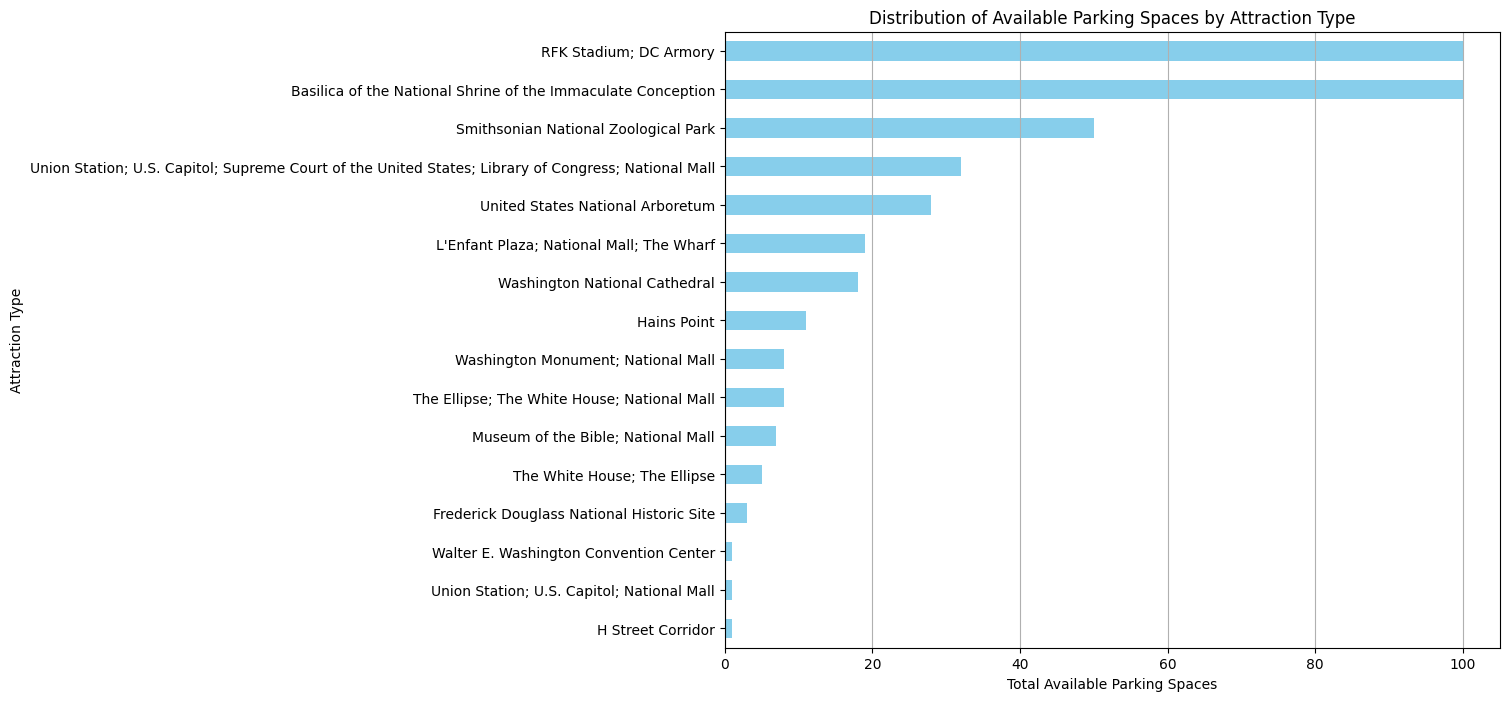

In [24]:
plt.figure(figsize=(10, 8))
bus_parking_df.groupby('ATTRACTION')['SPACES'].sum().sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribution of Available Parking Spaces by Attraction Type')
plt.xlabel('Total Available Parking Spaces')
plt.ylabel('Attraction Type')
plt.grid(axis='x')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


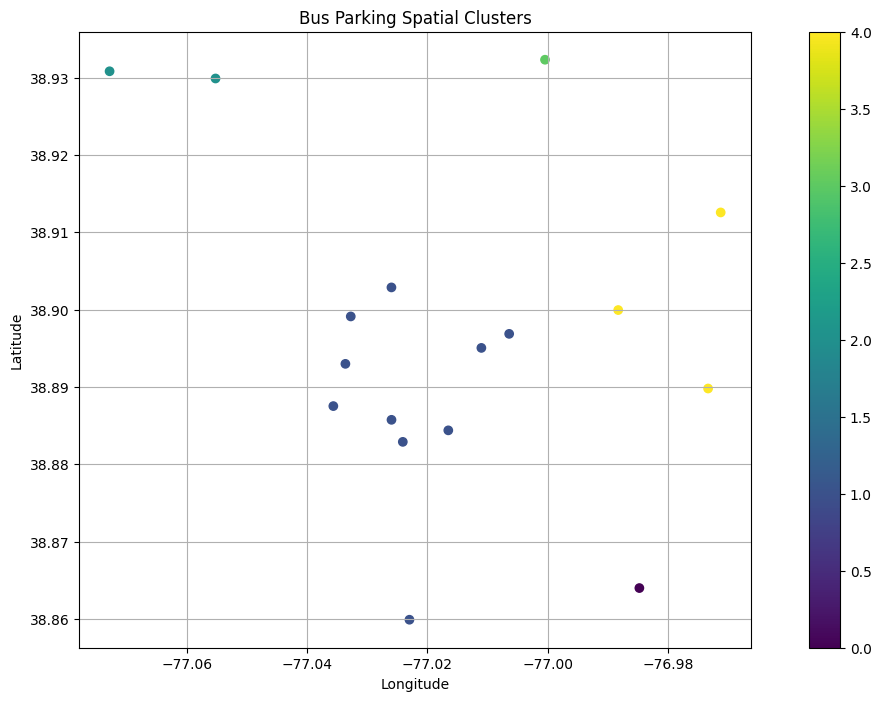

In [40]:
from sklearn.cluster import KMeans

# Extract latitude and longitude coordinates from the 'geometry' column
bus_parking_df['Latitude'] = bus_parking_df['geometry'].y
bus_parking_df['Longitude'] = bus_parking_df['geometry'].x

# Prepare features for clustering
X = bus_parking_df[['Latitude', 'Longitude']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
labels = kmeans.fit_predict(X)

# Add cluster labels to the GeoDataFrame
bus_parking_df['Cluster'] = labels

# Visualize the clusters on a map
fig, ax = plt.subplots(figsize=(15, 8))
bus_parking_df.plot(ax=ax, column='Cluster', cmap='viridis', legend=True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bus Parking Spatial Clusters')
plt.grid(True)
plt.show()
